In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import os
os.listdir('../data')
assert 'out_breed.csv' in os.listdir('../data') # this assert breaks if the data is configured uncorrectly

In [3]:
breeds = pd.read_csv('../data/out_breed.csv')
colors = pd.read_csv('../data/out_color.csv')
states = pd.read_csv('../data/out_state.csv')
train  = pd.read_csv('../data/out_train.csv')
test   = pd.read_csv('../data/out_test.csv')
sub    = pd.read_csv('../data/out_submission.csv')

In [4]:
average_distribution = (train['AdoptionSpeed'].value_counts() / len(train)).sort_index()
average_distribution

0    0.027346
1    0.206096
2    0.269259
3    0.217368
4    0.279931
Name: AdoptionSpeed, dtype: float64

Text(0.5, 1.0, 'this is the distribution of the target classes over the whole dataset')

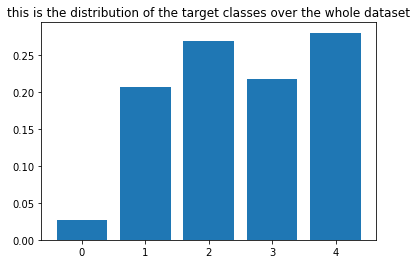

In [9]:
plt.bar([0,1,2,3,4], average_distribution)
plt.title("this is the distribution of the target classes over the whole dataset")

<h2>FEAT #00 : (binary) the pet has a name

In [21]:
unnamed_index = train['Name'].apply(lambda n: isinstance(n, float) or n == "No Name")
named_index = ~unnamed_index
FEAT00 = named_index

In [22]:
named, unnamed = train[named_index], train[unnamed_index]

In [25]:
len(named), len(unnamed), len(unnamed) / len(named)

(13682, 1311, 0.0958193246601374)

In [26]:
unnamed_distribution = (unnamed['AdoptionSpeed'].value_counts() / len(unnamed)).sort_index()
unnamed_distribution

0    0.022121
1    0.217391
2    0.246377
3    0.169336
4    0.344775
Name: AdoptionSpeed, dtype: float64

In [27]:
named_distribution = (named['AdoptionSpeed'].value_counts() / len(named)).sort_index()
named_distribution

0    0.027847
1    0.205014
2    0.271452
3    0.221970
4    0.273717
Name: AdoptionSpeed, dtype: float64

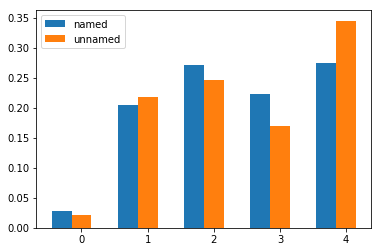

In [28]:
size = 0.3
plt.bar([i - size for i in range(len(named_distribution))], named_distribution, width=size, label='named')
plt.bar(range(len(average_distribution)), unnamed_distribution, width=size, label='unnamed')
plt.legend()

looks like in the first week it doesn't matter if the dog has a name, but for [2,3,4] looks like there is a statistical significance. [<b>what does nan mean?</b>]

<h2>FEAT #01 : (binary) the pet has a number in the name

In [45]:
cleaned = train[~train['Name'].isna()]

In [46]:
FEAT = cleaned['Name'].apply(lambda s: any([c.isdigit() for c in s]))

In [47]:
len(cleaned[~FEAT]), len(cleaned[FEAT]), len(cleaned[FEAT]) / len(cleaned[~FEAT])

(12474, 1262, 0.10117043450376784)

In [48]:
feat_distribution = (cleaned[FEAT]['AdoptionSpeed'].value_counts() / len(cleaned[FEAT])).sort_index()
feat_distribution

0    0.021395
1    0.233756
2    0.269414
3    0.229002
4    0.246434
Name: AdoptionSpeed, dtype: float64

In [49]:
nofeat_distribution = (cleaned[~FEAT]['AdoptionSpeed'].value_counts() / len(cleaned[~FEAT])).sort_index()
nofeat_distribution

0    0.028620
1    0.202341
2    0.271364
3    0.220779
4    0.276896
Name: AdoptionSpeed, dtype: float64

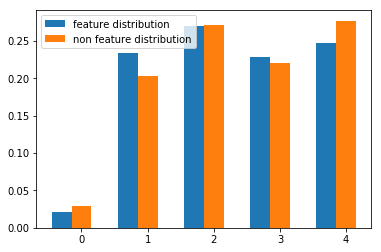

In [50]:
size = 0.3
plt.bar([i - size for i in range(len(feat_distribution))], feat_distribution, width=size, label='feature distribution')
plt.bar(range(len(nofeat_distribution)), nofeat_distribution, width=size, label='non feature distribution')
plt.legend()

<h2>FEAT #02 : (binary) the pet has a coded name (e.g. BA21)

In [51]:
cleaned = train[~train['Name'].isna()]

In [52]:
FEAT = cleaned['Name'].apply(lambda s: s.isupper() and any([c.isdigit() for c in s]))

In [53]:
len(cleaned[~FEAT]), len(cleaned[FEAT]), len(cleaned[FEAT]) / len(cleaned[~FEAT])

(13501, 235, 0.017406118065328494)

In [54]:
feat_distribution = (cleaned[FEAT]['AdoptionSpeed'].value_counts() / len(cleaned[FEAT])).sort_index()
feat_distribution

0    0.017021
1    0.187234
2    0.306383
3    0.340426
4    0.148936
Name: AdoptionSpeed, dtype: float64

In [55]:
nofeat_distribution = (cleaned[~FEAT]['AdoptionSpeed'].value_counts() / len(cleaned[~FEAT])).sort_index()
nofeat_distribution

0    0.028146
1    0.205540
2    0.270573
3    0.219465
4    0.276276
Name: AdoptionSpeed, dtype: float64

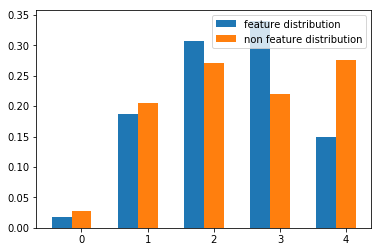

In [56]:
size = 0.3
plt.bar([i - size for i in range(len(feat_distribution))], feat_distribution, width=size, label='feature distribution')
plt.bar(range(len(nofeat_distribution)), nofeat_distribution, width=size, label='non feature distribution')
plt.legend()

too small population to draw conclusions

<h2>FEAT #03 : (binary) is the name frequent (appeared more than 10 times?)</h2>
 <p>this could be also a numerical feat: name frequency

In [126]:
name_freq = cleaned['Name'].value_counts()

In [128]:
cleaned['freq'] = cleaned['Name'].map(dict(name_freq))

/Users/alex/Desktop/Coding/AI/kaggle-pets/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [130]:
FEAT = cleaned['freq'] > 10

In [131]:
len(cleaned[~FEAT]), len(cleaned[FEAT]), len(cleaned[FEAT]) / len(cleaned[~FEAT])

(11632, 2104, 0.18088033012379642)

In [132]:
feat_distribution = (cleaned[FEAT]['AdoptionSpeed'].value_counts() / len(cleaned[FEAT])).sort_index()
feat_distribution

0    0.032319
1    0.206274
2    0.271863
3    0.187262
4    0.302281
Name: AdoptionSpeed, dtype: float64

In [133]:
nofeat_distribution = (cleaned[~FEAT]['AdoptionSpeed'].value_counts() / len(cleaned[~FEAT])).sort_index()
nofeat_distribution

0    0.027166
1    0.205038
2    0.271063
3    0.227734
4    0.268999
Name: AdoptionSpeed, dtype: float64

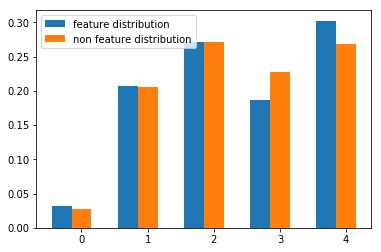

In [134]:
size = 0.3
plt.bar([i - size for i in range(len(feat_distribution))], feat_distribution, width=size, label='feature distribution')
plt.bar(range(len(nofeat_distribution)), nofeat_distribution, width=size, label='non feature distribution')
plt.legend()

<p>this looks a bit more interesting, similar to FEAT #0 for the first 0,1,2 no evidence, but for 3,4 look that names that appeared more then 10 times are harder to get adopted</p>

<h1>FEAT #04 : (binary) is the name shorter than 3 chars?

In [139]:
FEAT = cleaned['Name'].apply(lambda s: len(s) <= 3)

In [140]:
len(cleaned[~FEAT]), len(cleaned[FEAT]), len(cleaned[FEAT]) / len(cleaned[~FEAT])

(13068, 668, 0.05111723293541475)

In [141]:
feat_distribution = (cleaned[FEAT]['AdoptionSpeed'].value_counts() / len(cleaned[FEAT])).sort_index()
feat_distribution

0    0.023952
1    0.205090
2    0.288922
3    0.251497
4    0.230539
Name: AdoptionSpeed, dtype: float64

In [142]:
nofeat_distribution = (cleaned[~FEAT]['AdoptionSpeed'].value_counts() / len(cleaned[~FEAT])).sort_index()
nofeat_distribution

0    0.028160
1    0.205234
2    0.270279
3    0.220003
4    0.276324
Name: AdoptionSpeed, dtype: float64

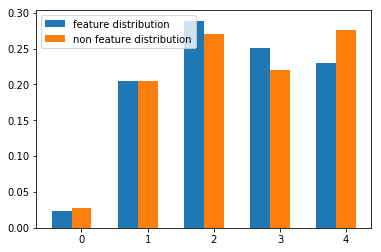

In [143]:
size = 0.3
plt.bar([i - size for i in range(len(feat_distribution))], feat_distribution, width=size, label='feature distribution')
plt.bar(range(len(nofeat_distribution)), nofeat_distribution, width=size, label='non feature distribution')
plt.legend()